In [1]:
## imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

company_index='5'
company_name='Amazon'
img_path = root + '/Desktop/dm_project/data/companies/'+f'{company_index}_{company_name}'
img_flag = False

if not os.path.exists(img_path):
    os.makedirs(img_path)

In [2]:
def merge_data(company_list=[5], uni=False, bi=False, tri=False):
    sentences = []
    df_company_list = pd.read_csv( root + \
            '/Desktop/dm_project/data/scraper_data/indeed_site50.csv')
   
    data_companies = []
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        data_path_pros = root + '/Desktop/dm_project/data/companies/'+\
                    f'{company_index}_{company_name}'+'/output_data/px_data3/pros.csv'
        data_path_cons = root + '/Desktop/dm_project/data/companies/'+\
                    f'{company_index}_{company_name}'+'/output_data/px_data3/cons.csv'
        df_pros = pd.read_csv(data_path_pros)
        df_cons = pd.read_csv(data_path_cons)
        num_pros = df_pros.shape[0]
        num_cons = df_cons.shape[0]
        num_reviews = num_pros + num_cons
        avg_rating = df_pros.Ratings.mean()*.5 + df_cons.Ratings.mean()*.5
        if(company_name=='United-Parcel-Service-(UPS)'):
            company_name='UPS'
        data_companies.append([company_index, company_name, num_pros, num_cons, num_reviews, avg_rating])
    
        
    return pd.DataFrame(data_companies, columns = ['Compnay_Index', 'Company_Name', 'Num_Pros', 'Num_Cons', 
                                           'Num_Reviews', 'Avg_Rating'])


df_companies = merge_data(company_list=range(1, 51))


In [3]:
df_companies.head()


,Compnay_Index,Company_Name,Num_Pros,Num_Cons,Num_Reviews,Avg_Rating
0,1,Walmart,81133,78195,159328,3.447192
1,2,Exxonmobil,1204,1168,2372,3.886164
2,3,Apple,2863,2692,5555,4.052582
3,4,Berkshire-Hathaway,64,61,125,4.039447
4,5,Amazon,14434,14250,28684,3.470209


,Compnay_Index,Company_Name,Num_Pros,Num_Cons,Num_Reviews,Avg_Rating
0,1,Walmart,81133,78195,159328,3.447192
26,27,Home-Depot,22742,21823,44565,3.705620
38,39,Target,20762,19865,40627,3.574714
8,9,AT&T,17899,17019,34918,3.711530
41,42,Lowe's,16748,16066,32814,3.612819
40,41,UPS,15408,15134,30542,3.785972
28,29,Wells-Fargo,15086,14295,29381,3.641185
4,5,Amazon,14434,14250,28684,3.470209
19,20,Kroger,14301,14046,28347,3.442111
24,25,Bank-of-America,12164,11408,23572,3.755055


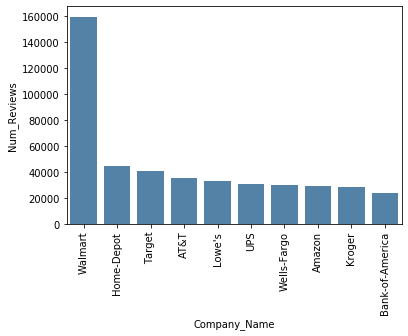

In [4]:
sns.barplot(x='Company_Name', y='Num_Reviews', 
            data=df_companies.sort_values(by='Num_Reviews', ascending=False).head(10), color='steelblue')
plt.xticks(rotation=90)
display(df_companies.sort_values(by='Num_Reviews', ascending=False).head(10))

,Compnay_Index,Company_Name,Num_Pros,Num_Cons,Num_Reviews,Avg_Rating
3,4,Berkshire-Hathaway,64,61,125,4.039447
16,17,Walgreens-Boots-Alliance,244,246,490,3.236839
22,23,Phillips-66,264,243,507,3.633090
39,40,Freddie-Mac,279,263,542,3.704322
30,31,Marathon-Petroleum,341,318,659,3.718558
48,49,Archer-Daniels-Midland,345,336,681,3.365179
45,46,United-Technologies,442,411,853,3.639490
21,22,Fannie-Mae,440,415,855,3.923398
34,35,DuPont-de-Nemours,631,585,1216,3.836003
23,24,Valero-Energy,656,636,1292,3.722556


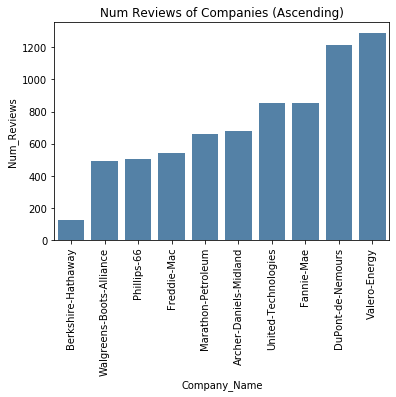

In [8]:
sns.barplot(x='Company_Name', y='Num_Reviews', 
            data=df_companies.sort_values(by='Num_Reviews', ascending=True).head(10), color='steelblue')
plt.xticks(rotation=90)
display(df_companies.sort_values(by='Num_Reviews', ascending=True).head(10))
plt.title('Num Reviews of Companies (Ascending)')
plt.savefig(root+'/Desktop/Paper/img/Num_Reviews_asc.pdf')

,Compnay_Index,Company_Name,Num_Pros,Num_Cons,Num_Reviews,Avg_Rating
14,15,Google,855,775,1630,4.217846
36,37,Johnson-&-Johnson,1015,940,1955,4.137900
13,14,Costco-Wholesale,3637,3330,6967,4.128025
11,12,Ford-Motor-Company,1519,1447,2966,4.058750
2,3,Apple,2863,2692,5555,4.052582
3,4,Berkshire-Hathaway,64,61,125,4.039447
25,26,Microsoft,1706,1599,3305,4.034879
42,43,Intel,1620,1499,3119,4.026359
44,45,Proctor-&-Gamble,1164,1108,2272,3.980596
27,28,Boeing,3354,3189,6543,3.938411


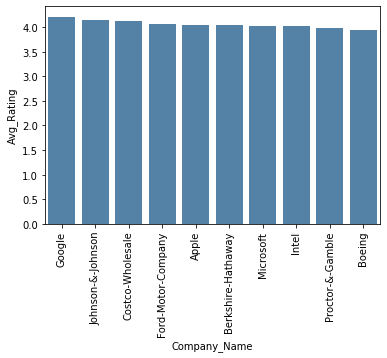

In [9]:
sns.barplot(x='Company_Name', y='Avg_Rating', 
            data=df_companies.sort_values(by='Avg_Rating', ascending=False).head(10), color='steelblue')
plt.xticks(rotation=90)
display(df_companies.sort_values(by='Avg_Rating', ascending=False).head(10))

,Compnay_Index,Company_Name,Num_Pros,Num_Cons,Num_Reviews,Avg_Rating
16,17,Walgreens-Boots-Alliance,244,246,490,3.236839
7,8,CVS-Health,9748,9687,19435,3.253778
9,10,AmerisourceBergen,750,727,1477,3.261649
48,49,Archer-Daniels-Midland,345,336,681,3.365179
5,6,UnitedHealth-Group,7148,6904,14052,3.402304
19,20,Kroger,14301,14046,28347,3.442111
0,1,Walmart,81133,78195,159328,3.447192
15,16,Cardinal-Health,1664,1597,3261,3.455725
4,5,Amazon,14434,14250,28684,3.470209
47,48,PepsiCo,3702,3563,7265,3.494893


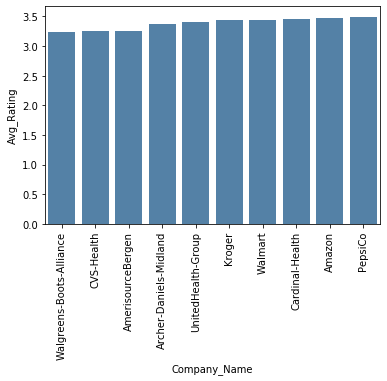

In [7]:
sns.barplot(x='Company_Name', y='Avg_Rating', 
            data=df_companies.sort_values(by='Avg_Rating', ascending=True).head(10), color='steelblue')
plt.xticks(rotation=90)
display(df_companies.sort_values(by='Avg_Rating', ascending=True).head(10))

In [10]:
display(df_companies.Num_Reviews.sum())
display(df_companies.Num_Pros.sum())
display(df_companies.Num_Cons.sum())
display(df_companies.Avg_Rating.mean())

675117

344573

330544

3.7337426887580505

In [11]:
df_companies.mean()


Compnay_Index       25.500000
Num_Pros          6891.460000
Num_Cons          6610.880000
Num_Reviews      13502.340000
Avg_Rating           3.733743
dtype: float64

## After Preprocessing, taking those reviews that had length > 3. 

In [12]:
## imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

company_index='5'
company_name='Amazon'
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/'\
# +f'{company_index}_{company_name}'
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/LDA_vis'
# img_flag = False

# if not os.path.exists(img_path):
#     os.makedirs(img_path)

In [13]:
## making dataset

def get_px_data(company_index=5, company_name='Amazon',
                uni=True, bi=True, tri=True, procon = 'pros'):
    if procon == 'pros':
        data_path = root + '/Desktop/dm_project/data/companies/'+\
                    f'{company_index}_{company_name}'+'/output_data/px_data4/pros.csv'
    elif procon == 'cons':
        data_path = root + '/Desktop/dm_project/data/companies/'+\
                    f'{company_index}_{company_name}'+'/output_data/px_data4/cons.csv'
    else: 
        data_path = root + '/Desktop/dm_project/data/companies/'+\
                    f'{company_index}_{company_name}'+'/output_data/px_data_reviews1/reviews.csv'
    df = pd.read_csv(data_path)
#     print(df.head())
    df_data = pd.DataFrame()
#     df_data['Company_Index'] = company_index
    
    df_data['Ratings'] = df['Ratings']
    df_data['Job_Status'] = df['Job_Status']
    df_data['Reviewed_Year'] = df['Reviewed_Year'].astype("int")
    df_data['Review_Text'] = df['Review_Text']
    
    
    if uni and bi and tri:
        df_data['Px_Texts'] = df['Unigrams'].fillna('') + ' ' +\
        df['Bigrams'].fillna('') + ' ' + df['Trigrams'].fillna('')
    elif uni:
        df_data['Px_Texts'] = df['Unigrams'].dropna()
    elif bi:
        df_data['Px_Texts'] = df['Bigrams'].dropna()
    elif tri:
        df_data['Px_Texts'] = df['Trigrams'].dropna()
    df_data['Tknz_Texts'] = df_data['Px_Texts'].str.split()
    df_data['Doc_Length'] = df_data['Tknz_Texts'].str.len()
    
    df_data['Work_Life'] = df['Work_Life']
    df_data['Benefits'] = df['Benefits']
    df_data['Job_Advancement'] = df['Job_Advancement']
    df_data['Management'] = df['Management']
    df_data['Culture'] = df['Culture']
#     df_data['Pro_Con'] = procon
    df_data['Company_Index'] = company_index
    df_data['Company_Name'] = (company_name)
#     df_data = df_data[df_data.Doc_Length > 3]
    return df_data

# display(get_px_data().head())
# display(get_px_data().shape[0]+get_px_data(procon='cons').shape[0])
get_px_data(procon='reviews').head()

,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name
0,3.0,0,2019,The job was good but overly fast paced hard to...,correct could error fast hard heard manner mis...,"[correct, could, error, fast, hard, heard, man...",17,4.0,5.0,2.0,4.0,3.0,5,Amazon
1,1.0,0,2019,Managers were not professional just the whole ...,loud manag profession toward,"[loud, manag, profession, toward]",4,2.0,5.0,5.0,2.0,1.0,5,Amazon
2,2.0,0,2019,I have nothing to say really if you need a job...,appli balanc date everyday life mandatori over...,"[appli, balanc, date, everyday, life, mandator...",14,2.0,0.0,2.0,2.0,2.0,5,Amazon
3,4.0,0,2019,I was contracted through the concentrix. Amazo...,awesom care contract environ mind opportun ple...,"[awesom, care, contract, environ, mind, opport...",7,4.0,4.0,3.0,3.0,4.0,5,Amazon
4,4.0,0,2019,Productive and nice work environment. It feels...,environ famili feel friendli hard manag move n...,"[environ, famili, feel, friendli, hard, manag,...",16,3.0,4.0,4.0,3.0,4.0,5,Amazon


## Use this if you need pro cons sampled

In [14]:
def merge_data(company_list=[5], uni=False, bi=False, tri=False):
    sentences = []
    df_company_list = pd.read_csv( root + \
            '/Desktop/dm_project/data/scraper_data/indeed_site50.csv')
    sentences = pd.DataFrame(columns = ['Ratings', 'Job_Status', 'Reviewed_Year', 'Review_Text', 'Px_Texts',
                                        'Tknz_Texts', 'Doc_Length', 'Work_Life', 'Benefits', 'Job_Advancement', 
                                        'Management', 'Culture', 'Company_Index', 'Company_Name'])
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        px_sents = get_px_data(company_index=company_index, company_name=company_name, 
                        uni=uni, bi=bi, tri=tri, procon='reviews')
        if (px_sents.shape[0]) < 1000:
            sentences = pd.concat([sentences, px_sents], ignore_index=True)
        else:
            sentences = pd.concat([sentences, px_sents.sample(n=1000, random_state=42)],\
                                  ignore_index=True)
#             sentences = pd.concat([sentences, px_sents.sample(n=1000, random_state=6)],\
#                                   ignore_index=True)
    return sentences

# sentences = merge_data(company_list=[5],
#                         uni=True, bi=True, tri=True)
sentences = merge_data(company_list=range(1, 51),
                        uni=True, bi=True, tri=True)
# sentences = merge_data(company_list=[5, 6, 7, 8, 9, 10],
#                         uni=True, bi=True, tri=True)
# print(len(sentences))
display(sentences.head())
display(sentences.shape)

# sentences.to_csv('~/Desktop/dm_project/data/prepx/review_sampled_6_.csv')

,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name
0,2.0,1,2014,I love my customer but rare I will get a rude ...,cowork custom fun love pleas rare rude cowork_...,"[cowork, custom, fun, love, pleas, rare, rude,...",11,2.0,2.0,2.0,2.0,2.0,1,Walmart
1,3.0,0,2016,The company is ok to work for had no problems ...,accommod chang load manag ok polici rotat sche...,"[accommod, chang, load, manag, ok, polici, rot...",11,2.0,3.0,2.0,3.0,3.0,1,Walmart
2,3.0,0,2018,I worked as deli associate at WalMart. What I ...,associ custom deli enjoy fast like look pace p...,"[associ, custom, deli, enjoy, fast, like, look...",19,3.0,2.0,2.0,2.0,3.0,1,Walmart
3,2.0,0,2017,I really think this place is terrible. The wor...,aw call could cultur employe imposs manag near...,"[aw, call, could, cultur, employe, imposs, man...",12,1.0,2.0,2.0,1.0,2.0,1,Walmart
4,3.0,1,2018,"Wal-Mart was a fun, productive, good values wh...",appreci associ bad chang clock come dollar enj...,"[appreci, associ, bad, chang, clock, come, dol...",32,2.0,2.0,3.0,2.0,3.0,1,Walmart


(46813, 14)

In [15]:
# sentences["Tknz_Texts"].count().sort_values(by="ascending")


In [16]:
sentences.groupby('Company_Name')['Review_Text'].count()

Company_Name
AT&T                           1000
Amazon                         1000
AmerisourceBergen              1000
Anthem                         1000
Apple                          1000
Archer-Daniels-Midland          632
Bank-of-America                1000
Berkshire-Hathaway              127
Boeing                         1000
CVS-Health                     1000
Cardinal-Health                1000
Chevron                        1000
Citigroup                      1000
Comcast                        1000
Costco-Wholesale               1000
Dell-Technologies              1000
DuPont-de-Nemours              1000
Exxonmobil                     1000
Fannie-Mae                     1000
FedEx                          1000
Ford-Motor-Company             1000
Freddie-Mac                     667
General-Electric               1000
General-Motors                 1000
Google                         1000
Home-Depot                     1000
IBM                            1000
Intel          

## Use this if you want all pro con texts

In [6]:
def merge_data(company_list=[5], uni=False, bi=False, tri=False):
    sentences = []
    df_company_list = pd.read_csv( root + \
            '/Desktop/workspace/indeed/Job-Satisfaction/data/scraper_data/indeed_site50.csv')
    sentences = pd.DataFrame(columns = ['Ratings', 'Job_Status', 'Reviewed_Year', 'Review_Text', 'Px_Texts',
                                        'Tknz_Texts', 'Doc_Length', 'Work_Life', 'Benefits', 'Job_Advancement', 
                                        'Management', 'Culture', 'Company_Index', 'Company_Name'])
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        px_sents = get_px_data(company_index=company_index, company_name=company_name, 
                        uni=uni, bi=bi, tri=tri, procon='pros')
#         if (px_sents.shape[0]) < 1000:
        sentences = pd.concat([sentences, px_sents], ignore_index=True)
#         else:
# #             sentences = pd.concat([sentences, px_sents.sample(n=1000, random_state=42)],\
# #                                   ignore_index=True)
#             sentences = pd.concat([sentences, px_sents.sample(n=1000, random_state=6)],\
#                                   ignore_index=True)
    return sentences

# sentences = merge_data(company_list=[5],
#                         uni=True, bi=True, tri=True)
sentences = merge_data(company_list=range(1, 51),
                        uni=True, bi=True, tri=True)
# sentences = merge_data(company_list=[5, 6, 7, 8, 9, 10],
#                         uni=True, bi=True, tri=True)
# print(len(sentences))
display(sentences.head())
display(sentences.shape)


sentences.to_csv('~/Desktop/dm_project/data/prepx/pro_doc_all_px4.csv')

,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name
0,1.0,0,2019,The only good part for me was it was close to ...,close hous,"[close, hous]",2,1.0,1.0,1.0,1.0,1.0,1,Walmart
1,5.0,0,2019,Benefits,benefit,[benefit],1,3.0,4.0,3.0,4.0,4.0,1,Walmart
2,1.0,0,2019,Some decent employees work there,decent employe,"[decent, employe]",2,2.0,2.0,1.0,1.0,3.0,1,Walmart
3,2.0,0,2019,free luch on thankgiving sometimes they offer ...,free luch offer sometim time,"[free, luch, offer, sometim, time]",5,3.0,3.0,3.0,1.0,1.0,1,Walmart
4,3.0,0,2019,"15-minute breaks, 60-minute lunches in my stor...",break health insur lunch store vision,"[break, health, insur, lunch, store, vision]",6,3.0,4.0,4.0,2.0,3.0,1,Walmart


(344573, 14)

In [10]:
def merge_data(company_list=[5], uni=False, bi=False, tri=False):
    sentences = []
    df_company_list = pd.read_csv( root + \
            '/Desktop/workspace/indeed/Job-Satisfaction/data/scraper_data/indeed_site50.csv')
    sentences = pd.DataFrame(columns = ['Ratings', 'Job_Status', 'Reviewed_Year', 'Review_Text', 'Px_Texts',
                                        'Tknz_Texts', 'Doc_Length', 'Work_Life', 'Benefits', 'Job_Advancement', 
                                        'Management', 'Culture', 'Company_Index', 'Company_Name','Pro_Con'])
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        px_sents_pro = get_px_data(company_index=company_index, company_name=company_name, 
                        uni=uni, bi=bi, tri=tri, procon='pros')
        px_sents_con = get_px_data(company_index=company_index, company_name=company_name, 
                        uni=uni, bi=bi, tri=tri, procon='cons')
#         px_sents_pro['Num_Reviews'] = px_sents_pro.shape[0] + px_sents_con.shape[0]
#         px_sents_con['Num_Reviews'] = px_sents_pro.shape[0] + px_sents_con.shape[0]
        sentences = pd.concat([sentences, px_sents_pro], ignore_index=True)
        sentences = pd.concat([sentences, px_sents_con], ignore_index=True)
        
#         if (px_sents.shape[0]) < 1000:
#             sentences = pd.concat([sentences, px_sents], ignore_index=True)
#         else:
#             sentences = pd.concat([sentences, px_sents.sample(n=1000, random_state=42)],\
#                                   ignore_index=True)
    return sentences

# sentences = merge_data(company_list=[5],
#                         uni=True, bi=True, tri=True)
sentences = merge_data(company_list=range(1, 51),
                        uni=True, bi=True, tri=True)
# sentences = merge_data(company_list=[5, 6, 7, 8, 9, 10],
#                         uni=True, bi=True, tri=True)
# print(len(sentences))
display(sentences.head())
display(sentences.shape)


# sentences.to_csv('~/Desktop/dm_project/data/prepx/con.csv')

,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name,Pro_Con
0,1.0,0,2019,The only good part for me was it was close to ...,close hous,"[close, hous]",2,1.0,1.0,1.0,1.0,1.0,1,Walmart,NaN
1,5.0,0,2019,Benefits,benefit,[benefit],1,3.0,4.0,3.0,4.0,4.0,1,Walmart,NaN
2,1.0,0,2019,Some decent employees work there,decent employe,"[decent, employe]",2,2.0,2.0,1.0,1.0,3.0,1,Walmart,NaN
3,2.0,0,2019,free luch on thankgiving sometimes they offer ...,free luch offer sometim time,"[free, luch, offer, sometim, time]",5,3.0,3.0,3.0,1.0,1.0,1,Walmart,NaN
4,3.0,0,2019,"15-minute breaks, 60-minute lunches in my stor...",break health insur lunch store vision,"[break, health, insur, lunch, store, vision]",6,3.0,4.0,4.0,2.0,3.0,1,Walmart,NaN


(675117, 15)

In [17]:
df = sentences.copy()

In [18]:
df[df.Company_Name == 'Amazon'].head()

,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name
3127,3.0,1,2018,Most of the job is manual labor and there are ...,address amazon associ better cultur deadlin en...,"[address, amazon, associ, better, cultur, dead...",25,1.0,2.0,2.0,4.0,4.0,5,Amazon
3128,5.0,1,2018,"Flexible management, good benefits, advancemen...",advanc benefit call center custom flexibl foun...,"[advanc, benefit, call, center, custom, flexib...",19,4.0,4.0,4.0,5.0,4.0,5,Amazon
3129,4.0,1,2019,"It’s a basic warehouse job. You will clock in,...",basic clock day packag plan stand stretch talk...,"[basic, clock, day, packag, plan, stand, stret...",10,3.0,4.0,2.0,3.0,3.0,5,Amazon
3130,1.0,0,2019,They treat there employees like trash. Do not ...,employe fun manag poorli suck treat fun_manag ...,"[employe, fun, manag, poorli, suck, treat, fun...",9,1.0,4.0,2.0,1.0,1.0,5,Amazon
3131,4.0,0,2018,"At Amazon I had to pick and scan items, put th...",box cart front item pick scan ship wrap scan_i...,"[box, cart, front, item, pick, scan, ship, wra...",9,4.0,1.0,5.0,5.0,4.0,5,Amazon


,Company_Index,Company_Name,Review_Text
0,1,Walmart,1000
35,36,State-Farm-Insurance,1000
1,2,Exxonmobil,1000
26,27,Home-Depot,1000
27,28,Boeing,1000
28,29,Wells-Fargo,1000
29,30,Citigroup,1000
31,32,Comcast,1000
32,33,Anthem,1000
33,34,Dell-Technologies,1000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

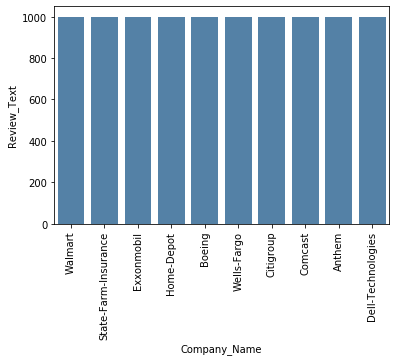

In [19]:
display(df.groupby(['Company_Index', 'Company_Name'])['Review_Text'].count().reset_index().\
        sort_values(by='Review_Text', ascending=False).head(10))
sns.barplot(x='Company_Name', y='Review_Text', 
            data=df.groupby(['Company_Index', 'Company_Name'])['Review_Text'].count().reset_index().\
            sort_values(by='Review_Text', ascending=False).head(10), color='steelblue')
plt.xticks(rotation=90)

,Company_Index,Company_Name,Review_Text
3,4,Berkshire-Hathaway,127
16,17,Walgreens-Boots-Alliance,384
22,23,Phillips-66,474
48,49,Archer-Daniels-Midland,632
30,31,Marathon-Petroleum,663
39,40,Freddie-Mac,667
45,46,United-Technologies,866
0,1,Walmart,1000
28,29,Wells-Fargo,1000
29,30,Citigroup,1000


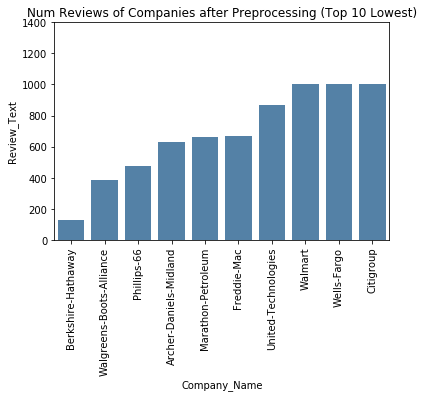

In [20]:
display(df.groupby(['Company_Index', 'Company_Name'])['Review_Text'].count().reset_index().\
        sort_values(by='Review_Text', ascending=True).head(20))
sns.barplot(x='Company_Name', y='Review_Text', 
            data=df.groupby(['Company_Index', 'Company_Name'])['Review_Text'].count().reset_index().\
            sort_values(by='Review_Text', ascending=True).head(10), color='steelblue')
plt.xticks(rotation=90)
plt.ylim([0, 1400])
plt.title('Num Reviews of Companies after Preprocessing (Top 10 Lowest)')
plt.savefig(root+'/Desktop/Paper/img/Num_Reviews_prepx_asc.pdf')

In [ ]:
df_pros = df[df.Pro_Con == 'pros']
display(df_pros.shape)
# df_pros.to_csv(root+'/Desktop/dm_project/data/prepx/pros_doc.csv')

In [ ]:
df_pros = df[df.Pro_Con == 'cons']
display(df_pros.shape)
# df_pros.to_csv(root+'/Desktop/dm_project/data/prepx/cons_doc.csv')